In [123]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [124]:
df = pd.read_csv('../data/ExamResults.csv')
# Split into A and B group
a = df.loc[df['Group'] == 'A']
b = df.loc[df['Group'] == 'B']

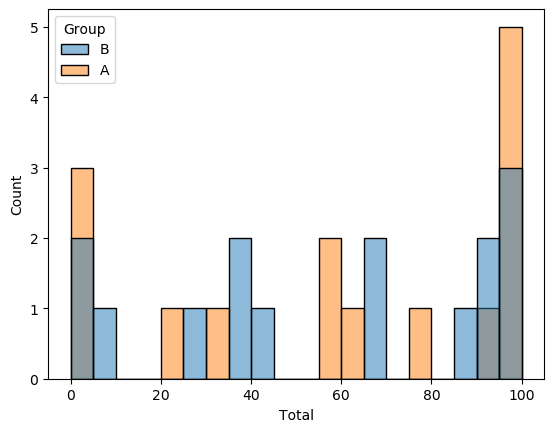

In [125]:
bins=[x for x in range(0, 105, 5)]

sns.histplot(df, x='Total', hue='Group', bins=bins)

In [134]:
fail = df.loc[df['Grade'] == 5.0]
len(df), len(fail)

(30, 12)

## Fairness of groups

Is there a significant (alpha = 0.01) difference in the mean total score between groups A and B?

In [127]:
_, pval = stats.ttest_ind(a['Total'], b['Total'], alternative='two-sided')
pval, pval < 0.01

(0.8325860231268719, False)

Is there a significant (alpha = 0.01) difference in the proportion of fails between groups A and B?

In [128]:
a_fail = a.loc[a['Grade'] == 5.0]
b_fail = b.loc[b['Grade'] == 5.0]

_, pval = proportions_ztest(count=[len(a_fail), len(b_fail)], nobs=15, alternative='two-sided')
pval, pval < 0.01

(0.4560565402502559, False)

Is there a significant (alpha = 0.01) difference in the mean total score of passes between groups A and B?

In [129]:
a_pass = a.loc[a['Grade'] < 5.0]
b_pass = b.loc[b['Grade'] < 5.0]

_, pval = stats.ttest_ind(a_pass['Total'], b_pass['Total'], alternative='two-sided')
pval, pval < 0.01

(0.671144607711985, False)

### First and Second Task

Was the difficulty of the first and second tasks unbalanced between groups A and B?

Is there a significant (alpha = 0.01) difference of the mean score in the first/second task between groups A and B?

In [130]:
_, pval = stats.ttest_ind(a['Task 1'], b['Task 1'], alternative='two-sided')
pval, pval < 0.01

(0.8839492295846059, False)

In [131]:
_, pval = stats.ttest_ind(a['Task 2'], b['Task 2'], alternative='two-sided')
pval, pval < 0.01

(0.95724447927409, False)

## Multiple Choice

Is the first task a good predictor for overall performance?

Is there a significant (alpha = 0.01) mean difference between the first task and the total score?

In [132]:
first = df['Task 1'] / 24
total = df['Total'] / 100

_, pval = stats.ttest_rel(first, total, alternative='two-sided')
pval, pval < 0.01

(0.4712345016733319, False)

In [133]:
df.sort_values('Student ID').iloc[:,[0,9]]

,Student ID,Grade
8,3108213,1.0
2,3108258,5.0
16,3108292,5.0
13,3114241,5.0
12,3114258,1.3
3,3114263,5.0
25,3114314,1.0
27,3114318,1.0
7,3114411,1.0
9,3114422,1.7
